In [1]:
import sympy
from sympy.physics.quantum.state import Ket, Bra
from sympy.physics.quantum.operator import HermitianOperator
from sympy import init_printing
from sympy import symbols, Sum, oo
from sympy import Function, Symbol
init_printing()

In [2]:
w1, w2, w3 = symbols("w1 w2 w3")
# expression = Bra("n") * HermitianOperator("mu_alpha") * Ket("0")/(w1-w2) - 1/2 *Bra("n") * HermitianOperator("mu") * Ket("0")/(w1-w3)
# n = Bra("n")
# n.label[0]
# print(expression.args)
# expression

In [3]:
n, m, null = symbols("n m 0")

q1, q2 = symbols("w w", real=True)
# a = Function("alpha")(-q1, q2)
Sum(Bra(n) * HermitianOperator("mu_alpha") * Ket(null), (n, 1, 1))

class a(Function):
    @classmethod
    def eval(cls, y):
        w = Symbol("w_{n0}", real=True)
#         o = Symbol("0")
        return Sum(
            Bra(0) * HermitianOperator("mu_alpha") * Ket(n) *
            Bra(n) * HermitianOperator("mu_beta") * Ket(0)/(w-y)
            + Bra(0) * HermitianOperator("mu_beta") * Ket(n) *
            Bra(n) * HermitianOperator("mu_alpha") * Ket(0)/(w+y), (n, 1, oo)
        )

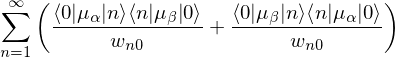

In [4]:
a(0)

In [5]:
class beta(Function):
    @classmethod
    def eval(cls, y):
        w = Symbol("w_{n0}", real=True)
        return (Bra(0) * HermitianOperator("mu_alpha") * Ket(n)
                * Bra(n) * HermitianOperator("mu_beta") * Ket(m)
                * Bra(m) * HermitianOperator("mu_gamma") * Ket(0)/(w-y)
                + Bra(0) * HermitianOperator("mu_gamma") * Ket(n) *
                Bra(n) * HermitianOperator("mu_beta") * Ket(m)
                * Bra(m) * HermitianOperator("mu_alpha") * Ket(0)/(w+y)
       )

In [6]:
beta(0).args[0].adjoint().subs({m:n, n:m}, simultaneous=True) == beta(0).args[1]

True

In [7]:
from sympy.physics.quantum import state as qmstate
from sympy.physics.quantum import operator as qmoperator
from sympy import srepr

def expectation_value_from_string(string):
    components = string.split("|")
    assert len(components) == 3
    bra_string = components[0].strip("<")
    ket_string = components[2].strip(">")
    operator_string = components[1]
    bra = qmstate.Bra(bra_string)
    ket = qmstate.Ket(ket_string)
    operator = qmoperator.HermitianOperator(operator_string)
    
    return bra, operator, ket

class ResponseFunction:
    def __init__(self, string):
        """
        <<omega;V_beta^omega>>
        """


class TransitionMoment:
    def __init__(self, string):
        """
        <0|mu_alpha|n>
        """
        if not isinstance(string, str):
            raise TypeError("Please provide a string to create a TransitionMoment")
        self.bra, self.operator, self.ket = expectation_value_from_string(string)
        self.build_expression()
    
    def build_expression(self):
        self.expression = self.bra * self.operator * self.ket
    
    def __str__(self):
        return srepr(self.expression)
    
    def __mul__(self, other):
        if isinstance(other, TransitionMoment):
            return self.expression * other.expression
        else:
            return self.expression * other
        
mu_alpha_tdm = TransitionMoment("<0|mu_alpha|n>")
mu_beta_tdm = TransitionMoment(r"<n|\bar{\mu_\beta}|m>")
mu_gamma_tdm = TransitionMoment("<m|mu_gamma|0>")

wn0, wsig, wm0, w2, w1 = symbols("\omega_{n0} -\omega_\sigma \omega_{m0} \omega_2 \omega_1")

wsig = (w1 + w2)

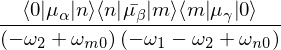

In [8]:
bla = mu_alpha_tdm * (mu_beta_tdm * mu_gamma_tdm)/((wn0-wsig)*(wm0-w2))
bla

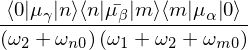

In [9]:
# generate permutation
bla.subs({-wsig:w2, w2:-wsig, "mu_alpha": "mu_gamma", "mu_gamma" : "mu_alpha"}, simultaneous=True)

In [10]:
from responsefun.response.sum_over_states import SumOverStatesExpression
import sympy.physics.quantum.operator as qmoperator
from sympy import Symbol
from sympy import latex

In [11]:
init_printing()
test_op_a = qmoperator.HermitianOperator("mu_alpha")
test_op_b = -qmoperator.HermitianOperator(r"\mu_\beta")
w = Symbol("w", real=True)
sos = SumOverStatesExpression(summation_indices=["n"], operators=[test_op_a, test_op_b],
                              frequencies=[w])

In [12]:
print(latex(sos.expression))

\frac{{\left\langle 0\right|} \mu_\beta {\left|n\right\rangle } {\left\langle n\right|} \mu_{\alpha} {\left|0\right\rangle }}{w + w_{n}} + \frac{{\left\langle 0\right|} \mu_{\alpha} {\left|n\right\rangle } {\left\langle n\right|} \mu_\beta {\left|0\right\rangle }}{- w + w_{n}}


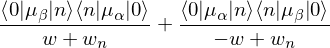

In [13]:
sos.expression

In [14]:
print(len(sos.expression.args))

2


In [15]:
print(sos.latex)

\frac{{\left\langle 0\right|} \mu_\beta {\left|n\right\rangle } {\left\langle n\right|} \mu_{\alpha} {\left|0\right\rangle }}{w + w_{n}} + \frac{{\left\langle 0\right|} \mu_{\alpha} {\left|n\right\rangle } {\left\langle n\right|} \mu_\beta {\left|0\right\rangle }}{- w + w_{n}}


In [16]:
test_op_a = qmoperator.HermitianOperator(r"\mu_{\alpha}")
test_op_b = -qmoperator.HermitianOperator(r"\mu_{\beta}")
test_op_c = -qmoperator.HermitianOperator(r"\mu_{\gamma}")
w1, w2 = symbols("w_1 w_2", real=True)
sos = SumOverStatesExpression(summation_indices=["n", "m"], operators=[test_op_a, test_op_b, test_op_c],
                              frequencies=[w1, w2])

In [17]:
print(sos.latex)

\frac{{\left\langle 0\right|} \mu_{\beta} {\left|m\right\rangle } {\left\langle m\right|} \bar{ \mu_{\gamma} } {\left|n\right\rangle } {\left\langle n\right|} \mu_{\alpha} {\left|0\right\rangle }}{\left(w_{2} + w_{m}\right) \left(w_{n} + w_{\sigma}\right)} + \frac{{\left\langle 0\right|} \mu_{\alpha} {\left|m\right\rangle } {\left\langle m\right|} \bar{ \mu_{\beta} } {\left|n\right\rangle } {\left\langle n\right|} \mu_{\gamma} {\left|0\right\rangle }}{\left(- w_{2} + w_{n}\right) \left(w_{m} - w_{\sigma}\right)} + \frac{{\left\langle 0\right|} \mu_{\beta} {\left|m\right\rangle } {\left\langle m\right|} \bar{ \mu_{\gamma} } {\left|n\right\rangle } {\left\langle n\right|} \mu_{\alpha} {\left|0\right\rangle }}{\left(w_{1} + w_{m}\right) \left(w_{n} + w_{\sigma}\right)} + \frac{{\left\langle 0\right|} \mu_{\beta} {\left|m\right\rangle } {\left\langle m\right|} \bar{ \mu_{\alpha} } {\left|n\right\rangle } {\left\langle n\right|} \mu_{\gamma} {\left|0\right\rangle }}{\left(w_{1} + w_{m}\righ

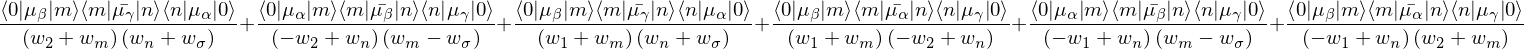

In [18]:
sos.expression

In [19]:
b = HermitianOperator("-1,b")
b.label